In [1]:
# 
#
# Map plot
# 
#

In [1]:
# Packages

# data handling
import numpy as np
import pandas as pd

# plotting
import matplotlib.pyplot as plt
import matplotlib.cm as mpl
%matplotlib inline

import cartopy.crs as ccrs
import cartopy.feature as cfeat


# paths and loading
import os
from scipy.io import loadmat

# other
import timeit


# update packages
import shapely
import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning) 




In [3]:
# choose variables
data_path = '/Users/cbla0002/Documents/data_matlab'

# all
percentiles= ['95th_percentile', '97th_percentile', '99th_percentile']
var_files= ['domain', 'convective_objects', 'aggregation_index', 'examples']
insts = ['IPSL','NOAA-GFDL','NASA-GISS','BCC','CNRM-CERFACS','NCAR'
        ,'NIMR-KMA','BNU','ICHEC','LASG-CESS','MPI-M','CMCC','INM','NCC' 
        ,'CCCma','MIROC','MOHC','MRI','NSF-DOE-NCAR']
vars= ['pr','hus','tas','convective_objects','aggregation_indelon']
scenarios= ['historical', 'rcp85']


# chosen
percentile= ['97th_percentile']
var_file= ['domain']
inst = ['IPSL']
var= ['pr']
scenario= ['historical']



In [4]:
# check variables
fileName = inst[0] + '_' + var_file[0] + '_' + var[0] + '_' + scenario[0] 
#print(fileName)

file_path = os.path.abspath(os.path.join(data_path, percentile[0], var_file[0], fileName))
#print(file_path)

data = loadmat(file_path)
print(data.keys())


dict_keys(['__header__', '__version__', '__globals__', 'M_area', 'M_lat', 'M_lon', 'Rx1day_pr', 'Rx1day_pr_annual', 'Rx1day_pr_image', 'Rx5day_pr', 'Rx5day_pr_annual', 'Rx5day_pr_image', 'Wlat', 'Wlon', 'area_prctile', 'day_of_snapshot', 'gridbox_5day_pr', 'gridbox_pr', 'lat', 'lat_old', 'lon', 'lon_old', 'mean_pr_image', 'mean_pr_prctile_rate', 'mean_pr_prctile_vol', 'mean_pr_vol', 'prctile_rate_99', 'prctile_rate_99_9', 'prctile_rate_99_99', 'snapshot_pr_image', 'time_range', 'trop_end', 'trop_start'])


In [5]:
threshold = np.squeeze(data['mean_pr_prctile_rate'])
print(threshold)

15.995109298524772


In [6]:
# Define base variables
#print(np.shape(data['lon']))

lon = np.squeeze(data['lon'],axis=1)
lat = np.squeeze(data['lat'],axis=1)
z = data['snapshot_pr_image']
z = np.transpose(z)

lon2d, lat2d= np.meshgrid(lon,lat)

#print(np.shape(lon))
#print(lon[0:5])
#print(lon2d[0:5,0:5])
#print(lat2d[0:5,0:5])
#print(lon[0])
#print(lon[-1])

In [7]:
print(np.shape(lon2d))

(22, 128)


In [8]:
lat[2]-lat[1]
lon[2]-lon[1]

2.8125

In [9]:
# z has the shape of lat, lon
print(np.shape(z))
print(np.shape(lon))
print(np.shape(lat))

(22, 128)
(128,)
(22,)


In [10]:
print(lon[2]-lon[1])
print(lat[2]-lat[1])

2.8125
2.7905941009521484


In [2]:
import xarray as xr
L = skm.label(pr_day.where(pr_day>=conv_threshold,0)>0, background=0,connectivity=2)

NameError: name 'skm' is not defined

In [1]:
# plot data + map
fig= plt.figure(figsize=(15,5))
ax= fig.add_subplot(1,1,1, projection=ccrs.PlateCarree(central_longitude=180))

ax.add_feature(cfeat.COASTLINE)
ax.set_extent([lon[0], lon[-1], lat[0], lat[-1]], crs=ccrs.PlateCarree())

pcm=ax.pcolormesh(lon2d,lat2d,z,transform=ccrs.PlateCarree(),zorder=0, vmin=0, vmax=15) #, edgecolor='k') #, cmap='blues')

#cax = ax.inset_axes([1.04, 0.2, 0.05, 0.6])
#fig.colorbar(pcm, ax=ax, cax=cax)

plt.colorbar(pcm, ax=ax, orientation='horizontal',pad=0.15, aspect=50, fraction=0.055)

ax.set_xticks([-180, -90, 0, 90, 180])
ax.set_xticklabels([0, 90, 180, 270, 360])
ax.set_yticks([-20, 0, 20])


plt.text(-40, 32.5, inst[0] + ' ' + 'pr_mean ' + scenario[0], fontsize=15)
plt.text(-10,-42.5, 'longitude')
plt.text(-195,-7.5, 'latitude', rotation=90)
plt.text(-35,-70, 'precipitation (mm/day)',fontsize=12)


NameError: name 'plt' is not defined

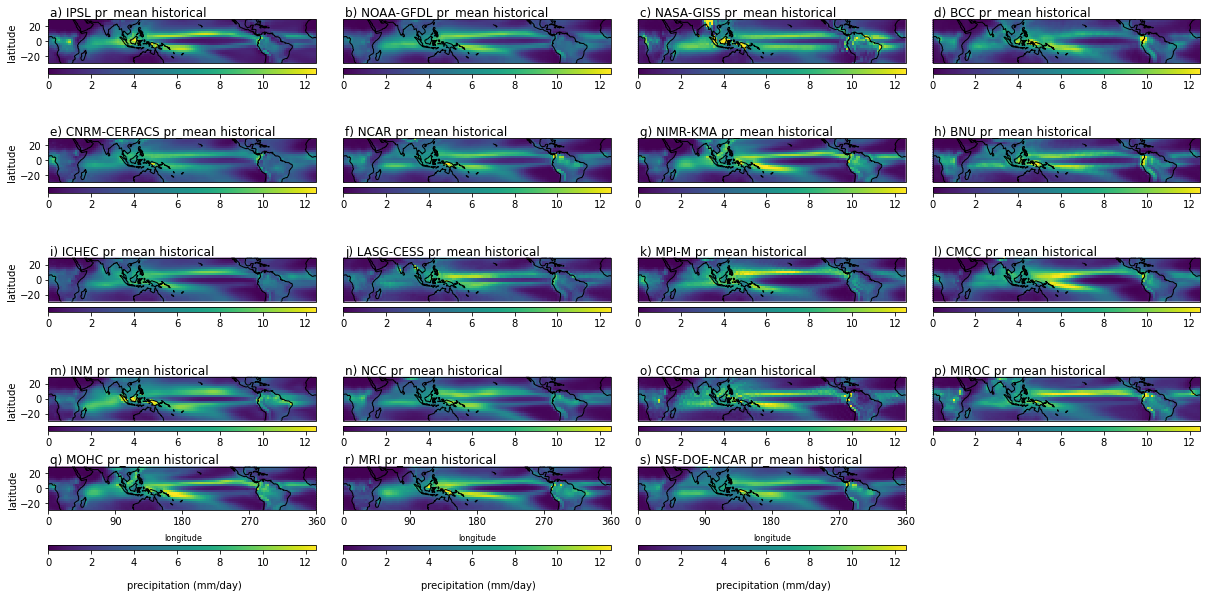

In [ ]:
# subplots (mean)
fig= plt.figure(figsize=(20,10))

for i in np.arange(1,20,1):
    ax= fig.add_subplot(5,4,i, projection=ccrs.PlateCarree(central_longitude=180)) #gridspec, specify subplot size here
    ax.add_feature(cfeat.COASTLINE)
    ax.set_extent([lon[0], lon[-1], lat[0], lat[-1]], crs=ccrs.PlateCarree())

    fileName = insts[i-1] + '_' + var_file[0] + '_' + var[0] + '_' + scenario[0] 
    file_path = os.path.abspath(os.path.join(data_path, percentile[0], var_file[0], fileName))
    data = loadmat(file_path)
    z = data['mean_pr_image']
    z = np.transpose(z)

    pcm= ax.pcolormesh(lon2d,lat2d,z,transform=ccrs.PlateCarree(),zorder=0, vmin=0,vmax=12.5)

    letters='abcdefghijklmnopqrs'
    plt.text(-177.5, 32.5, letters[i-1] + ') ' + insts[i-1] + ' ' + 'pr_mean ' + scenario[0], fontsize=12)

    if i== 1 or i==5 or i==9 or i==13 or i==17:
        ax.set_yticks([-20, 0, 20])
        plt.text(-235,-25, 'latitude', rotation=90)


    if i>16:
        plt.colorbar(pcm, ax=ax, orientation='horizontal',pad=0.35, aspect=50, fraction=0.055)
        plt.text(-25,-70, 'longitude',fontsize=8)
        plt.text(-75,-135, 'precipitation (mm/day)',fontsize=10)
        ax.set_xticks([-180, -90, 0, 90, 180])
        ax.set_xticklabels([0, 90, 180, 270, 360])
        #plt.subplots_adjust(hspace=0.1)
    else:
        plt.colorbar(pcm, ax=ax, orientation='horizontal',pad=0.05, aspect=50, fraction=0.055) #shrink=
        #plt.subplots_adjust(hspace=0.0005)


plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.1) #hspace=0.001)


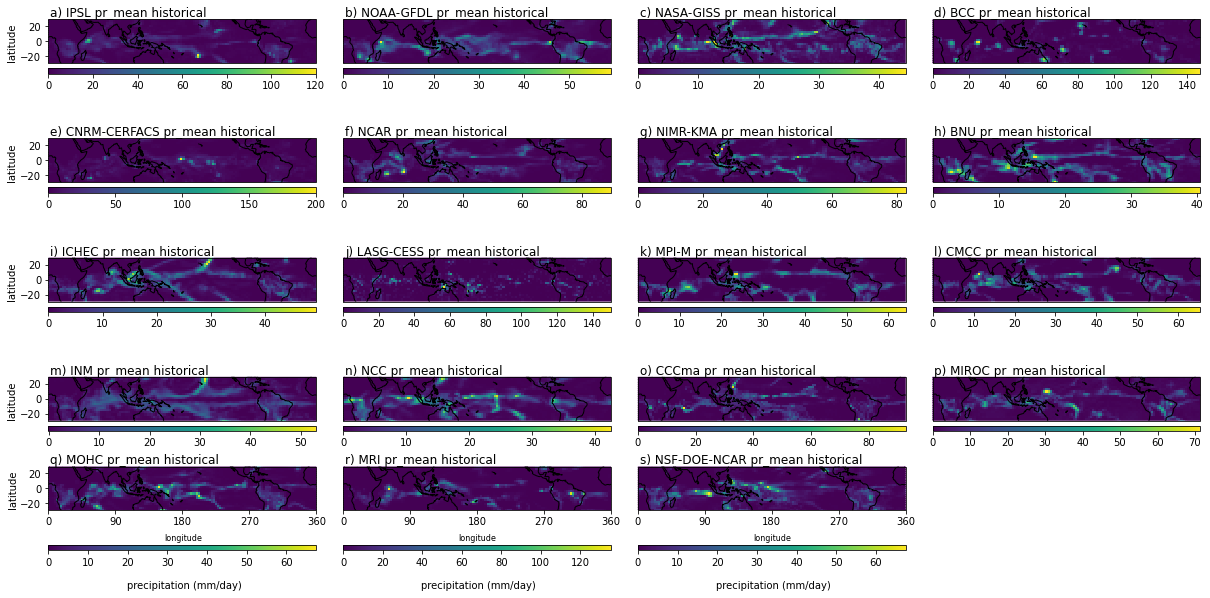

In [ ]:
# subplots (snapshot)
fig= plt.figure(figsize=(20,10))

for i in np.arange(1,20,1):
    ax= fig.add_subplot(5,4,i, projection=ccrs.PlateCarree(central_longitude=180)) #gridspec, specify subplot size here
    ax.add_feature(cfeat.COASTLINE)
    ax.set_extent([lon[0], lon[-1], lat[0], lat[-1]], crs=ccrs.PlateCarree())

    fileName = insts[i-1] + '_' + var_file[0] + '_' + var[0] + '_' + scenario[0] 
    file_path = os.path.abspath(os.path.join(data_path, percentile[0], var_file[0], fileName))
    data = loadmat(file_path)
    z = data['snapshot_pr_image']
    z = np.transpose(z)

    pcm= ax.pcolormesh(lon2d,lat2d,z,transform=ccrs.PlateCarree(),zorder=0) #,vmin=0,vmax=12)

    letters='abcdefghijklmnopqrs'
    plt.text(-177.5, 32.5, letters[i-1] + ') ' + insts[i-1] + ' ' + 'pr_mean ' + scenario[0], fontsize=12)

    if i== 1 or i==5 or i==9 or i==13 or i==17:
        ax.set_yticks([-20, 0, 20])
        plt.text(-235,-25, 'latitude', rotation=90)


    if i>16:
        plt.colorbar(pcm, ax=ax, orientation='horizontal',pad=0.35, aspect=50, fraction=0.055)
        plt.text(-25,-70, 'longitude',fontsize=8)
        plt.text(-75,-135, 'precipitation (mm/day)',fontsize=10)
        ax.set_xticks([-180, -90, 0, 90, 180])
        ax.set_xticklabels([0, 90, 180, 270, 360])
        #plt.subplots_adjust(hspace=0.1)
    else:
        plt.colorbar(pcm, ax=ax, orientation='horizontal',pad=0.05, aspect=50, fraction=0.055) #shrink=
        #plt.subplots_adjust(hspace=0.0005)


plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.1) #hspace=0.001)



In [ ]:
#subplots alt
# import matplotlib.pyplot as plt
# import numpy as np; np.random.seed(1)

# fig, (ax, cax) = plt.subplots(nrows=2,figsize=(4,4), 
#                   gridspec_kw={"height_ratios":[1, 0.05]})
# im = ax.imshow(np.random.rand(11,16))
# ax.set_xlabel("x label")

# fig.colorbar(im, cax=cax, orientation="horizontal")

# plt.show()

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from mpl_toolkits.axes_grid1 import make_axes_locatable
# data = np.arange(100, 0, -1).reshape(10, 10)
# fig, ax = plt.subplots(ncols=2, nrows=2)
# for row in ax:
#     for col in row:
#         im = col.imshow(data, cmap='bone')
#         divider = make_axes_locatable(col)
#         cax = divider.append_axes('right', size='5%', pad=0.05)
#         fig.colorbar(im, cax=cax, orientation='vertical')
# plt.show()